In [2]:
# Import libraries
import geopandas as gpd
import pandas as pd

In [3]:
# Load data
data_mun = gpd.read_file('./data/demographic_2020_2030_2040_mun.geojson')

In [7]:
data_mun.columns

Index(['key_0', 'DTMN', 'NUTSI_DSG', 'NUTSI_COD', 'NUTSII_DSG', 'NUTSII_COD',
       'NUTSIII_DSG', 'NUTSIII_COD', 'DISTRITO_ILHA_DSG', 'CONCELHO_DSG',
       'PopAbertH_2020', 'PopAbertM_2020', 'PopFechH_2020', 'PopFechM_2020',
       'Total_Aberta_2020', 'Total_Fechada_2020', 'PopAbertH_2030',
       'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030', 'Total_Aberta_2030',
       'Total_Fechada_2030', 'PopAbertH_2040', 'PopAbertM_2040',
       'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
       'Total_Fechada_2040', 'ratio_2030', 'ratio_2040', 'geometry'],
      dtype='object')

In [10]:
data_mun.NUTSIII_COD.unique()

array(['16I', '16D', '16G', '187', '150', '181', '16B', '170', '11E',
       '11D', '184', '16J', '185', '186', '16F', '11C', '112', '111',
       '16E', '11A', '11B', '119', '16H'], dtype=object)

In [11]:
data_mun.NUTSIII_DSG.unique()

array(['Médio Tejo', 'Região de Aveiro', 'Viseu Dão Lafões',
       'Alentejo Central', 'Algarve', 'Alentejo Litoral', 'Oeste',
       'Área Metropolitana de Lisboa', 'Terras de Trás-os-Montes',
       'Douro', 'Baixo Alentejo', 'Beiras e Serra da Estrela',
       'Lezíria do Tejo', 'Alto Alentejo', 'Região de Leiria',
       'Tâmega e Sousa', 'Cávado', 'Alto Minho', 'Região de Coimbra',
       'Área Metropolitana do Porto', 'Alto Tâmega', 'Ave', 'Beira Baixa'],
      dtype=object)

In [15]:
data_region = data_mun[['NUTSIII_DSG', 'PopAbertH_2020', 
                        'PopAbertM_2020', 'PopFechH_2020', 'PopFechM_2020',
                        'Total_Aberta_2020', 'Total_Fechada_2020', 'PopAbertH_2030',
                        'PopAbertM_2030', 'PopFechH_2030', 'PopFechM_2030', 'Total_Aberta_2030',
                        'Total_Fechada_2030', 'PopAbertH_2040', 'PopAbertM_2040',
                        'PopFechH_2040', 'PopFechM_2040', 'Total_Aberta_2040',
                        'Total_Fechada_2040', 'geometry']].dissolve(by='NUTSIII_DSG', aggfunc='sum')

<Axes: >

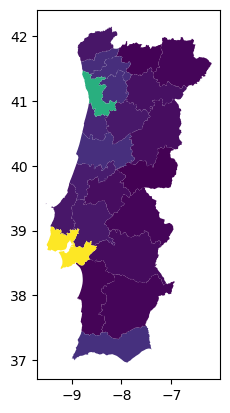

In [19]:
data_region.plot(column='Total_Aberta_2040')

In [26]:
data_region['ratio_2030'] = ((data_region['Total_Aberta_2030']/data_region['Total_Aberta_2020'])-1)*100
data_region['ratio_2040'] = ((data_region['Total_Aberta_2040']/data_region['Total_Aberta_2020'])-1)*100

<Axes: >

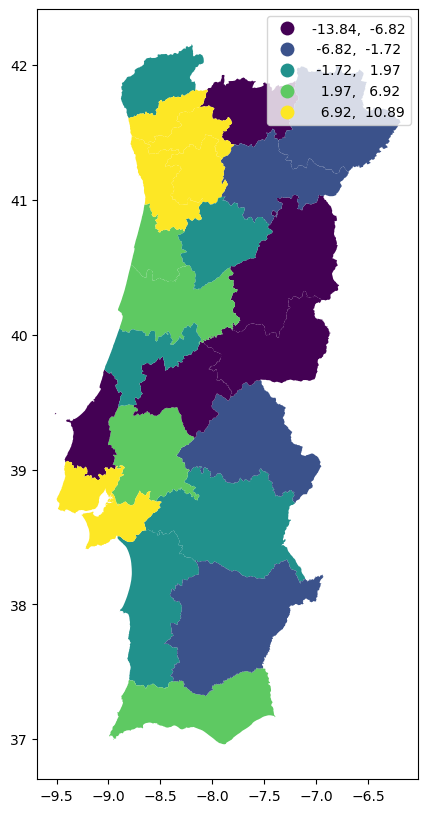

In [31]:
data_region.plot(column='ratio_2040', scheme='quantiles', legend=True, figsize=(10,10))


In [32]:
data_region.to_file("./data/demographic_2020_2030_2040_regions.geojson", driver="GeoJSON")